<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/5/50/Sante-publique-France-logo.svg/1200px-Sante-publique-France-logo.svg.png" style="float:right;background-color:#FFFFFF;padding:1%;width:15%" />

# Open Food Facts - Application de santé publique

Enoncé du projet : https://openclassrooms.com/fr/paths/148/projects/628/assignment

Descriptif du jeu de donnée : https://world.openfoodfacts.org/data/data-fields.txt

Choix Applicatif : Développement d'une application me permettant de mettre en place un programme alimentaire pour gagner en masse musculaire
 

### I- Nettoyage et traitement du dataset fournis par Open Food Facts disponible à la racine du projet 
1. Import des librairies et du dataset
2. Configuration du visuel des graphiques et tableaux
3. Nettoyage du dataset (check confirmité du dataset, Analyse et traitement des valeurs manquante, mise en forme pour faciliter l'imputation des données, analyse et traitement des outliers...)

### II- Etudes explorative afin de répondre à un certain nombre de question pour améliorer la santé des consommateur 
<img src="https://static.openfoodfacts.org/images/misc/openfoodfacts-logo-fr-178x150.png" style="float:right;background-color:#FFFFFF;padding:1%;width:15%;" />



# I- Nettoyage et traitement du dataset fournis par Open Food Facts
## Import des différentes librairies 

In [511]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn.impute as SimpleImputer
from scipy.stats import iqr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno
import datetime as datetime

<img src="https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg" style="float:right;background-color:#FFFFFF;padding:1%;width:10%;" />

## Setup pandas
Un peu de configuration pour l'affichage avec pandas#  2. Vue d'ensemble du jeu de données Open Food Facts

In [512]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRtnybdPHhrTGcKHSDozZi9rXXSgZAdx3JauFla06ZTnegURu4m&usqp=CAU" style="float:right;background-color:#FFFFFF;padding:1%;width:10%;" />

## Lecture du fichier
Commençons par lire notre fichier CSV :
- Séparateur : tabulation
- Décimal : point
- low_memory : False , alors des colonnes entières seront lues en premier, puis les types appropriés seront déterminés.

In [513]:
#Import csv
df = pd.read_csv("openfoodfacts.csv", decimal = '.', sep='\t', low_memory=False)
#Données initial
df_init = df.copy()

In [514]:
#Définition de la palette de couleurs pour le nutri score
score_palette = ["#88CC00", "#AACC00","#FFCC00","#FF8800","#FF0000" ]

In [515]:
VALID_SCORES = ['a','b','c','d','e']

In [516]:
# Information général
#Nombre de ligne et de colonnes initial
df.shape



(320772, 162)

320772 lignes et 162 colonnes

In [517]:
df.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,...,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,...,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
unique,320749,320749,3535,189567,189568,180495,180495,221347,38584,13826,14547,12064,58784,50253,36982,21142,21152,4840,4372,7308,6736,18114,13653,13655,8462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,Carton,"sachet,plastique",Carrefour,carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits",France,france,France,france,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",EMB 56251E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,169868,20,20,33,33,410,201,4669,2153,3959,2978,3149,301,802,802,5171,5303,9371,9451,3223,5311,5311,218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.149725,3.318263,12.058090,0.214408,13.498653,0.080953,0.914247,0.028036,0.067952,0.104503,0.006697,0.001118,0.001285,6.475588,0.172312,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000002,0.000000,0.000000,-0.000260,0.000000,0.000000,-6.896552,0.000000,0.000000,-0.000002,0.000007,0.000005,0.000000,0.000000,0.001800,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001368,0.000000,0.094000,0.000000,0.021000,0.001150,0.000177,0.000000,0.000018,0.000005,0.000011,0.000020,0.000015,0.015500,0.035000,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014600,0.035000,0.206000,0.001010,0.075000,0.003700,0.000417,0.001000,0.000060,0.000022,0.000023,0.000039,0.000034,0.021000,0.039000,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Traitement du jeu de données

## Check des colonnes 

On va controler que les colonnes du csv sont bien présente afin d'éviter de traiter qui aurait été manipuler par inadvertance 

In [518]:
col_list = ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 
            'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 
            'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 
            'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 
            'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 
            'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 
            'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 
            'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 
            'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 
            'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 
            'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 
            'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 
            'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 
            'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 
            'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 
            'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g', 
            'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 
            'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 
            'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 
            'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 
            'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 
            'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g']
err = 0
for col in col_list : 
    try : 
        df[col]
    except:
        print("La colonne {} est manquante dans le dataset chargé".format(col))
        err += 1
if err > 0 :
    print("Erreur : le dataset n'as pas été chargé suite à la colonne {} manquante".format(err))
elif df.shape[1] != len(col_list) : 
    print("Les colonnes suivant sont en trop dans le dataset :")
    print(set(df.columns.tolist()) - set(col_list))
else : 
    print("Les colonnes du dataset sont bien cohérente avec celles attendues")



Les colonnes du dataset sont bien cohérente avec celles attendues


## Visualisation de la nature de certaine données

#### VARIABLE CATEGORIQUE 

In [519]:
df.loc[:,'countries'].value_counts()

US                                            169928
France                                         77292
en:FR                                          16979
Suisse                                         12314
Deutschland                                     6161
                                               ...  
Tschechien,Dänemark,Frankreich,Deutschland         1
Danemark,Allemagne,France                          1
Dänemark,Frankreich,Deutschland,Indien             1
Dänemark                                           1
Hong Kong,China                                    1
Name: countries, Length: 1434, dtype: int64

On constate ici qu'on à affaire à des produits venant de plusieurs pays (USA, France principalement)

#### VARIABLE DISCRETE

In [520]:
df.loc[:,'additives_n'].value_counts()

0.0     94259
1.0     46509
2.0     36520
3.0     23680
4.0     15243
5.0     10935
6.0      7290
7.0      4702
8.0      3359
9.0      2194
10.0     1336
11.0      893
12.0      589
13.0      376
14.0      325
15.0      224
16.0      128
17.0      109
18.0       68
19.0       55
20.0       48
22.0       27
21.0       21
23.0       15
25.0       11
24.0       10
31.0        4
26.0        3
28.0        2
27.0        2
29.0        2
Name: additives_n, dtype: int64

Les produits renseignés possèdent entre 0 et 29 additifs.

In [521]:
df.loc[:,'ingredients_from_palm_oil_n'].value_counts()

0.0    244104
1.0      4776
2.0        59
Name: ingredients_from_palm_oil_n, dtype: int64

Il y a 4835 produits sur environ 249 000 produits renseigné comme ayant un ingrédient à base d'huile de palme.

In [522]:
df.loc[:,'ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    237243
1.0     10037
2.0      1321
3.0       286
4.0        45
5.0         6
6.0         1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

Cependant cette proportion passe à 11 696 produits sur 249 000 produits si l'on considère les ingrédients pouvant venir de l'huile de palme.

#### VARIABLES CONTINUES
Afin de déterminer la présence de valeurs aberrantes on affiche pour chaque variable les valeurs min max moyenne et écart type

In [523]:
df.loc[:,['energy_100g', 'energy-from-fat_100g', 'fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g']].describe()


,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g
count,2.611130e+05,857.000000,243891.000000,229554.000000,143298.000000,144090.000000
mean,1.141915e+03,585.501214,12.730379,5.129932,0.073476,0.020071
std,6.447154e+03,712.809943,17.578747,8.014238,1.540223,0.358062
min,0.000000e+00,0.000000,0.000000,0.000000,-3.570000,0.000000
25%,3.770000e+02,49.400000,0.000000,0.000000,0.000000,0.000000
50%,1.100000e+03,300.000000,5.000000,1.790000,0.000000,0.000000
75%,1.674000e+03,898.000000,20.000000,7.140000,0.000000,0.020000
max,3.251373e+06,3830.000000,714.290000,550.000000,369.000000,95.238000


In [524]:
df.loc[:,['carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g']].describe()

,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
count,243588.000000,244971.000000,200886.000000,259922.000000
mean,32.073981,16.003484,2.862111,7.075940
std,29.731719,22.327284,12.867578,8.409054
min,0.000000,-17.860000,-6.700000,-800.000000
25%,6.000000,1.300000,0.000000,0.700000
50%,20.600000,5.710000,1.500000,4.760000
75%,58.330000,24.000000,3.600000,10.000000
max,2916.670000,3520.000000,5380.000000,430.000000


In [525]:
df.loc[:,['salt_100g','sodium_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g']].describe()

,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000
mean,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652
std,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408
min,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260
25%,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000
50%,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010
75%,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400
max,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000


On constate que les valeurs max sont très éloignées de la moyenne et parfois n'ont pas de sens physique. Par exemple il y a des valeur supérieures à 100 sur des variables mesurant la quantité pour 100g. Il y a aussi des valeurs négatives ce qui n'a pas de sens physique. Il y a donc des valeurs aberrantes.

## Suppression des données inutiles

1. Suppression de la redondance des colonnes datetime et timestamp
2. Suppression de la colonne image de grande taille, pas utile de la conservé pour de la prévisualisation
3. Le nutri-score anglais nous se sera pas utile
4. On supprimer la colonne des portions qui contient des valeurs beaucoup trop hétérogène

In [526]:
for c in df.columns:
    if "_datetime" in c:
        df.drop([c],axis=1,inplace=True)
    if c in ["nutrition_grade_uk", "nutrition-score-uk_100g","image_url","serving_size"]:
        df.drop([c],axis=1,inplace=True)

## Produits vendus en france

In [527]:
#liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
#              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
#              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
#              'Polynésie Française', 'Mayotte']
#df[df['countries'].isin(liste_pays)]
#mask = (df.countries.str.contains('|'.join(liste_pays), regex=True, case=False)==False)
#df = df.drop(df[mask].index)

#print(df.countries.unique())
print(df.shape[0]," produits restants pour les produits vendus en France")

320772  produits restants pour les produits vendus en France


---> Une fois le nettoyage terminer je me suis retrouver avec 502 produits français pour mon projet et la suite de l'étude. J'ai décidé de revert le filtre sur les produits français afin d'avoir plus de matière pour la partie analyse

## Retrait des doublons sur le code

Analysons si nous avons des doublons sur les codes produits

In [528]:
dupl = df['code'].size - df['code'].unique().size
print("Le nombre de produit en doublon dans ce dataframe est de",dupl)

Le nombre de produit en doublon dans ce dataframe est de 22


In [529]:
df.dropna(subset = ['code'])

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,...,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,1474103893,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,1489069957,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,1489069957,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,1489055731,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,1489055653,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,1491244498,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,1491244499,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,1491244499,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,Plastique,plastique,乐吧,乐吧,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,1492340089,Tomates aux Vermicelles,NaN,67g,NaN,NaN,Knorr,knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Affichage des entrées multiples dans notre dataset

In [530]:
df[df.duplicated()]

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,...,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g


On remarque qu'il n'y a aucune entrée dupliquée, parfait. :-)


# Retrait des colonnes doublons
On retire les colonnes tags pour garder uniquement celles finissant par _fr

In [531]:
df.drop(["categories", "labels", "countries", "additives", "states", "main_category"], axis=1, inplace=True)

## Retrait des colonnes vides

In [532]:
for c in df.columns:
    if df[c].count()==0:
        print ("Serie : ",c," n'a aucune valeurs")
        df = df.drop(c,axis=1)

Serie :  no_nutriments  n'a aucune valeurs
Serie :  ingredients_from_palm_oil  n'a aucune valeurs
Serie :  ingredients_that_may_be_from_palm_oil  n'a aucune valeurs
Serie :  butyric-acid_100g  n'a aucune valeurs
Serie :  caproic-acid_100g  n'a aucune valeurs
Serie :  lignoceric-acid_100g  n'a aucune valeurs
Serie :  cerotic-acid_100g  n'a aucune valeurs
Serie :  melissic-acid_100g  n'a aucune valeurs
Serie :  elaidic-acid_100g  n'a aucune valeurs
Serie :  mead-acid_100g  n'a aucune valeurs
Serie :  erucic-acid_100g  n'a aucune valeurs
Serie :  nervonic-acid_100g  n'a aucune valeurs
Serie :  chlorophyl_100g  n'a aucune valeurs
Serie :  glycemic-index_100g  n'a aucune valeurs
Serie :  water-hardness_100g  n'a aucune valeurs


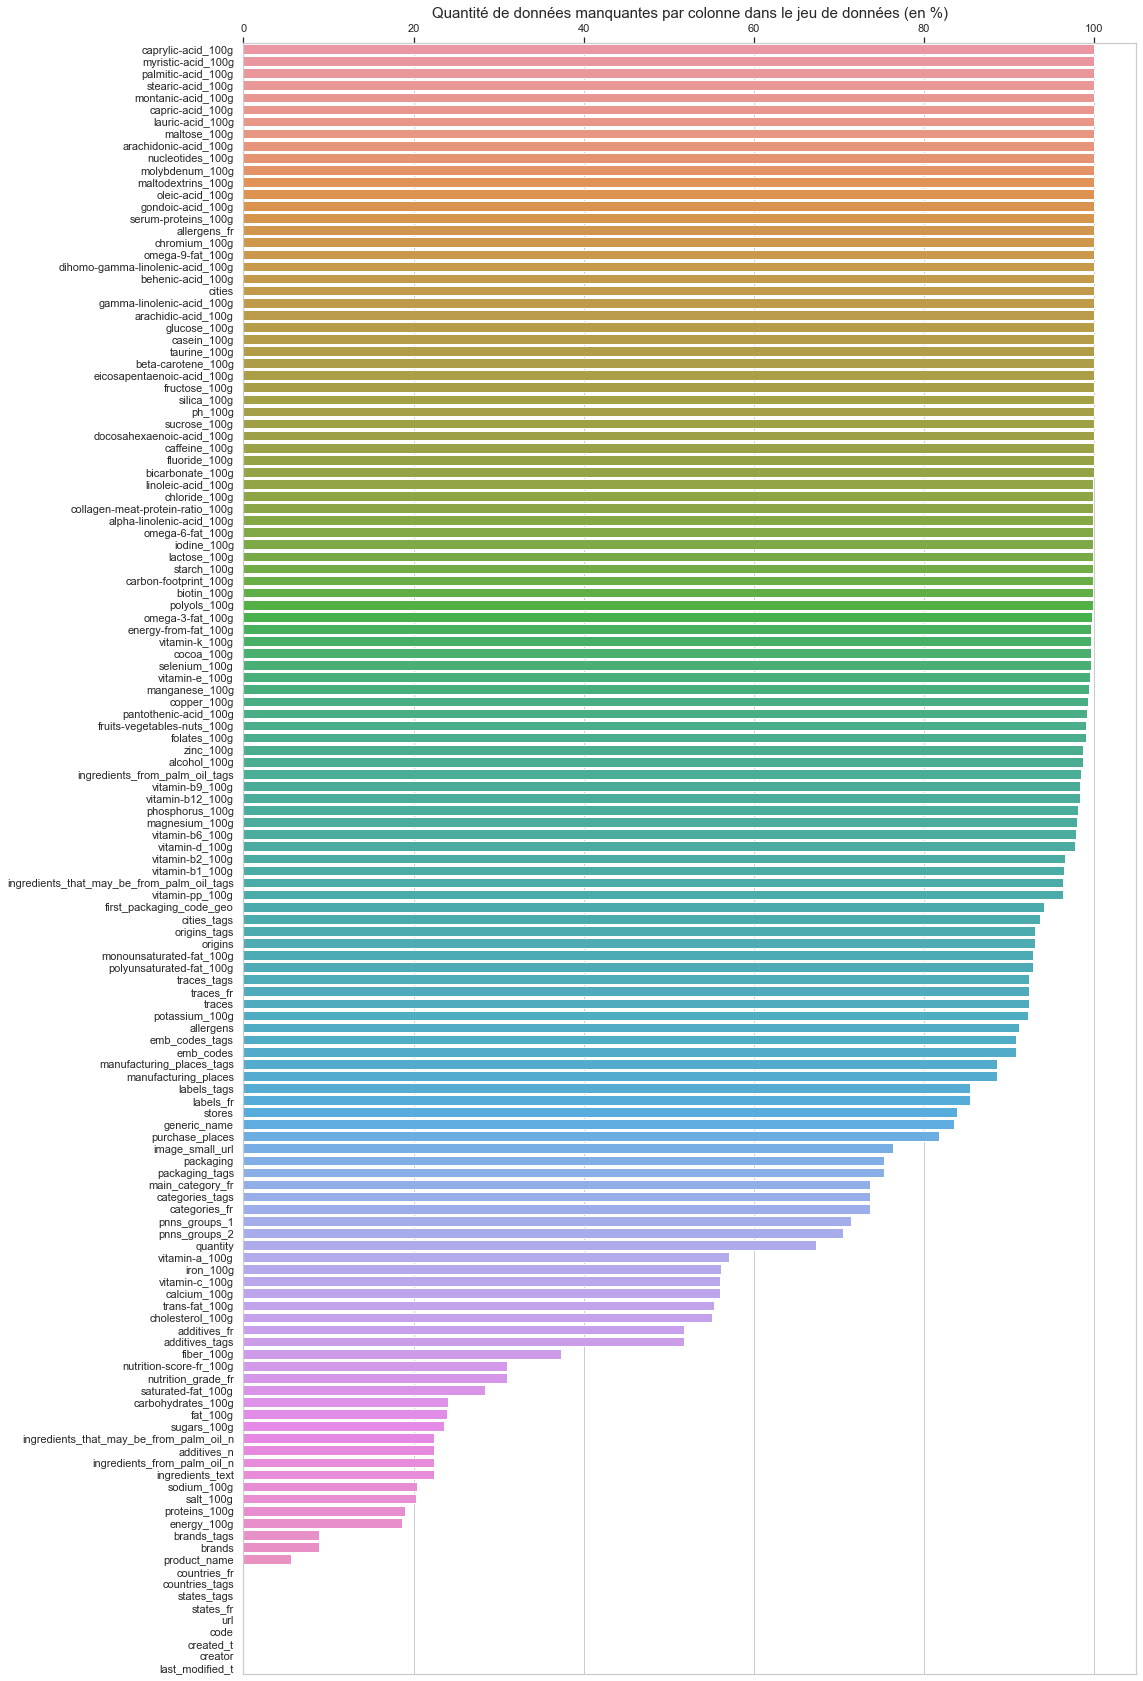

In [533]:
proportion_nan = df.isna().sum().divide(df.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

## Nettoyage des nan en NaN
Remplacement des faux nan par les NaN reconnu par pandas

In [534]:
df = df.replace(to_replace = '^nan$', value = np.nan, regex=True)
non_nan_quantity = (df.shape[0] - df.isna().sum())/df.shape[0]  
nb_NaN = df.shape[1]
df = df[non_nan_quantity[non_nan_quantity > 1- 0.75].index.tolist()]
nb_NaN = nb_NaN - df.shape[1]
print('Nombre de colonnes supprimées :', nb_NaN)

Nombre de colonnes supprimées : 94


## Visualisation des valeurs manquantes en utilisant matrix

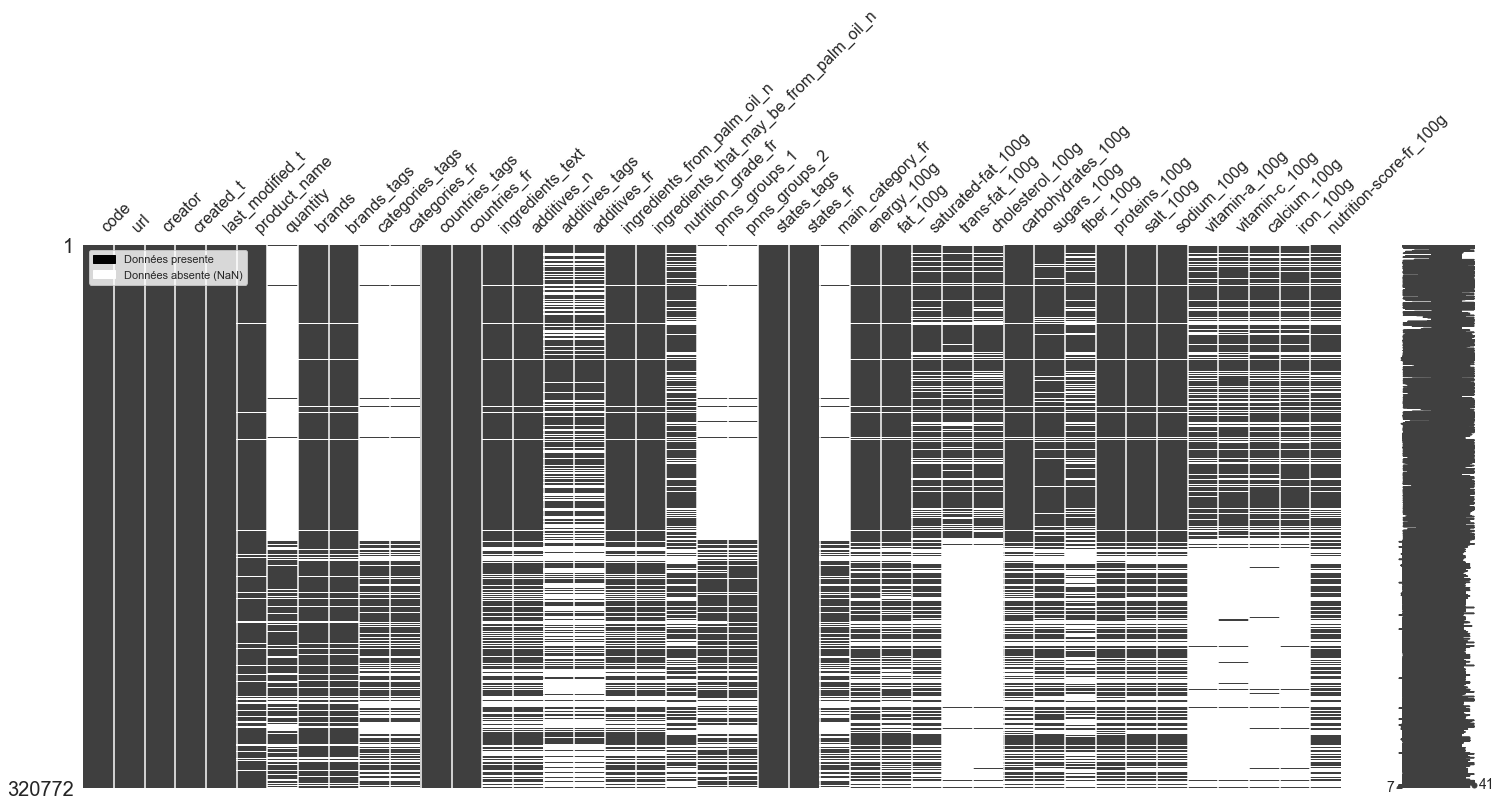

In [535]:
#Visualisation des valeurs manquantes en utilisant matrix
msno.matrix(df)
gray_patch = mpatches.Patch(color='black', label='Données presente')
white_patch = mpatches.Patch(color='white', label='Données absente (NaN)')
plt.legend(handles=[gray_patch, white_patch], loc='upper left')

## Préparation à l'imputation des valeurs manquantes visible ci-dessus

In [536]:
print(df.columns, df.shape)

Index(['code', 'url', 'creator', 'created_t', 'last_modified_t',
       'product_name', 'quantity', 'brands', 'brands_tags', 'categories_tags',
       'categories_fr', 'countries_tags', 'countries_fr', 'ingredients_text',
       'additives_n', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'states_fr',
       'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object') (320772, 41)


### Colonnes contenant des variables quantitatives discrètes. 
On va d'abord faire une imputation par rapport à la valeur médiane pour contrer les possibles valeurs extrêmes.
Suite à cela, on va changer leur type en int avant de les transformer à nouveau en object.

In [537]:
col_cat = ["additives_n", "ingredients_from_palm_oil_n"]

for cols in col_cat:
    df[cols].fillna(df[cols].median(), inplace=True)
    
for col in col_cat:
    df[col] = df[col].astype("int")
    df[col] = df[col].astype("object")

## Tri manuel des colonnes pertinantes

In [538]:
drop_cols = ["creator","created_t", "brands_tags", "categories_tags", "additives_tags", 
            "states_tags", "pnns_groups_1", "pnns_groups_2", "countries_tags"]
df.drop(drop_cols, axis=1, inplace=True)

Suppression de colonne qui ne me seront pas utile pour la suite du projet 

## Formatage des colonnes

In [539]:
df.dtypes

code                                        object
url                                         object
last_modified_t                             object
product_name                                object
quantity                                    object
brands                                      object
categories_fr                               object
countries_fr                                object
ingredients_text                            object
additives_n                                 object
additives_fr                                object
ingredients_from_palm_oil_n                 object
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
states_fr                                   object
main_category_fr                            object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
trans-fat_100g                 

On constate que toute les colonnes ne sont pas au bon format

In [540]:
#supprimer les ligne contenant une chaine de caractère dans les colonnes de date afin de formater correctement
#df = df[~df['created_t'].str.contains("[a-zA-Z]").fillna(False)]
df = df[~df['last_modified_t'].str.contains("[a-zA-Z]").fillna(False)]

In [545]:
 lstCols = df.columns
#booleans
#int
#floats
float_col =['energy_100g', 'saturated-fat_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']
for col in float_col : 
    df[col] = df[col].astype('float64')
#objects
object_col =['code', 'url', 'product_name', 'quantity', 'brands', 'categories_fr','countries_fr', 'additives_fr', 'states_fr',  'main_category_fr']
for col in object_col :
    df[col] = df[col].astype('object')
#categories
categories_col = ['nutrition_grade_fr']
for col in categories_col :
    df[col] = df[col].astype('category')
#datetimes
date_col = ["last_modified_t"]
for col in date_col : 
    df[col] = pd.to_datetime(df[col], unit='s') 

## Observation des colonnes qui contiennent à la fin "_t" et "_datetime"

In [546]:
print(df.iloc[:,df.columns.str.endswith('_t')].head())
print(df.iloc[:,df.columns.str.endswith('_t')].dtypes)

      last_modified_t
0 2016-09-17 09:18:13
1 2017-03-09 14:32:37
2 2017-03-09 14:32:37
3 2017-03-09 10:35:31
4 2017-03-09 10:34:13
last_modified_t    datetime64[ns]
dtype: object


In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320749 entries, 0 to 320771
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     320749 non-null  object        
 1   url                                      320749 non-null  object        
 2   last_modified_t                          320749 non-null  datetime64[ns]
 3   product_name                             302987 non-null  object        
 4   quantity                                 104800 non-null  object        
 5   brands                                   292360 non-null  object        
 6   categories_fr                            84389 non-null   object        
 7   countries_fr                             320469 non-null  object        
 8   ingredients_text                         248939 non-null  object        
 9   additives_n               

In [548]:
df.describe()

,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259906.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000
mean,0.055246,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.076366,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535
std,0.269207,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409137,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000
75%,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000
max,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000


In [549]:
df.shape

(320749, 32)

### Suppression des valeurs manquantes

In [550]:
# Copie où l'on va supprimer les valeurs manquantes sans les remplacer
df_clean_no_na = df.dropna()

<AxesSubplot:>

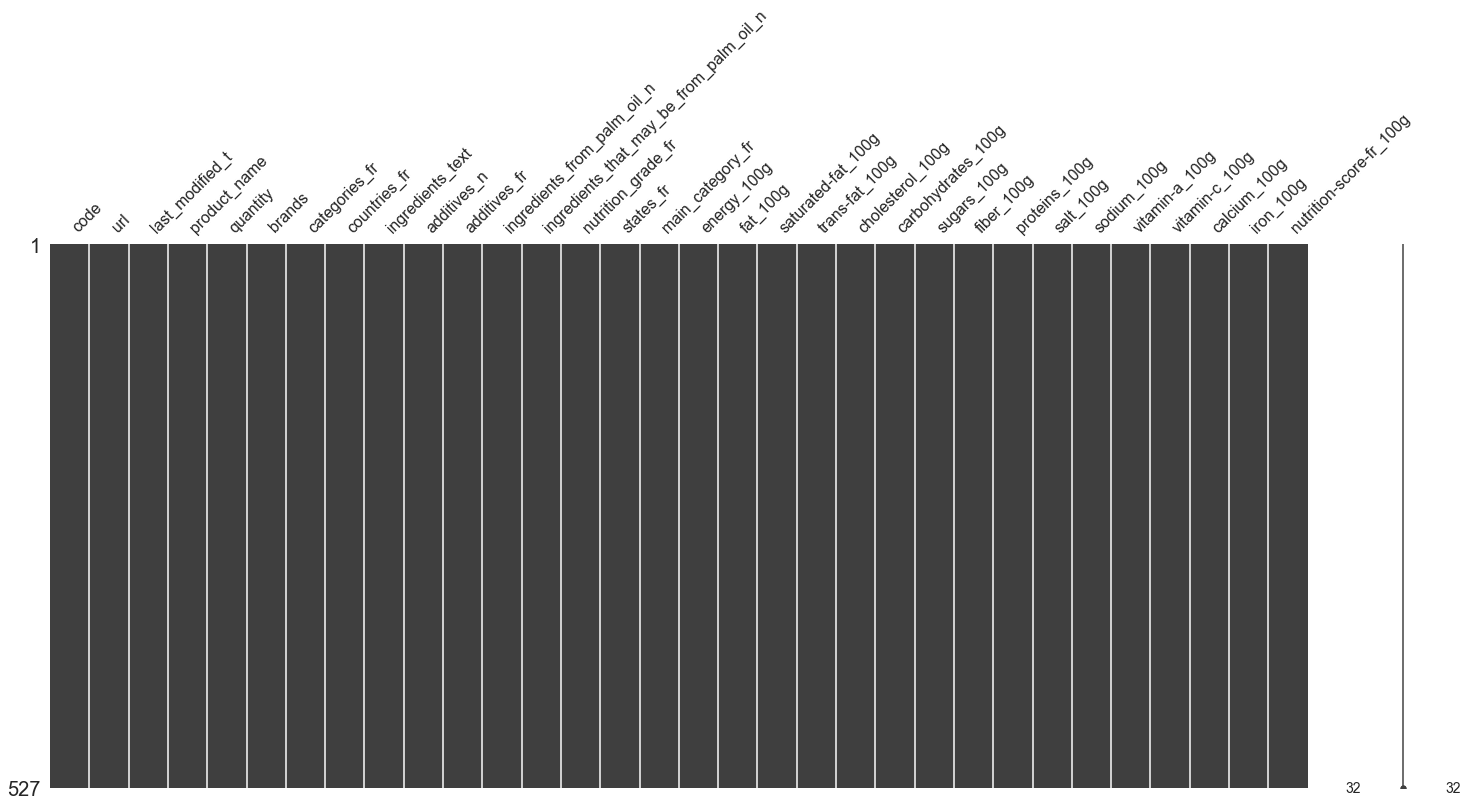

In [551]:
%matplotlib inline
msno.matrix(df_clean_no_na)

In [552]:
df_clean_no_na.describe()

,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,0.034156,1242.676643,12.610736,4.897393,0.025576,0.014329,39.563304,15.718510,2.322804,6.913723,1.514814,0.596401,0.000078,0.004400,0.081588,0.002297,10.480076
std,0.181801,727.965631,13.927608,6.364279,0.176138,0.028445,28.747132,17.680626,3.342591,6.721730,4.917891,1.935258,0.000219,0.017422,0.144113,0.004400,9.242564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,0.000000,495.500000,1.580000,0.000000,0.000000,0.000000,10.500000,3.105000,0.000000,2.865000,0.180000,0.071000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1420.000000,7.500000,2.000000,0.000000,0.000000,41.700000,7.810000,1.090000,5.770000,0.815340,0.321000,0.000000,0.000000,0.033100,0.001060,11.000000
75%,0.000000,1790.000000,20.000000,7.540000,0.000000,0.014700,66.700000,25.750000,3.520000,10.000000,1.640000,0.646500,0.000063,0.000000,0.106000,0.002880,18.000000
max,1.000000,3925.000000,78.600000,35.500000,3.230000,0.223000,106.000000,100.000000,28.300000,78.900000,99.900000,39.300000,0.002550,0.240000,1.430000,0.033800,31.000000


In [553]:
df_clean_no_na.shape

(527, 32)

In [554]:
df_clean_no_na.to_csv("openfoodfacts_clean_no_na.csv", index=False)

### Conclusion : 
On remarque que ce nettoyage produit un jeu de données plus restreint. On peut le sauvegarder pour le comparer par la suite. 
Cependant, le choix de travailler sur un jeu de données où les valeurs manquantes sont remplacées par une autre valeur et qu'on prenne en considération les outliers semble plus judicieux.

# Détections et corrections des anomalies

Pour détecter les anomalies et identifier le type de correction à effectuer, on va commencer par les visualiser à l'aide de boîtes à moustaches. Pour étayer cette analyse, on va aussi générer un tableau contenant les différentes informations statistiques pour mieux identifier la nature de nos anomalies.



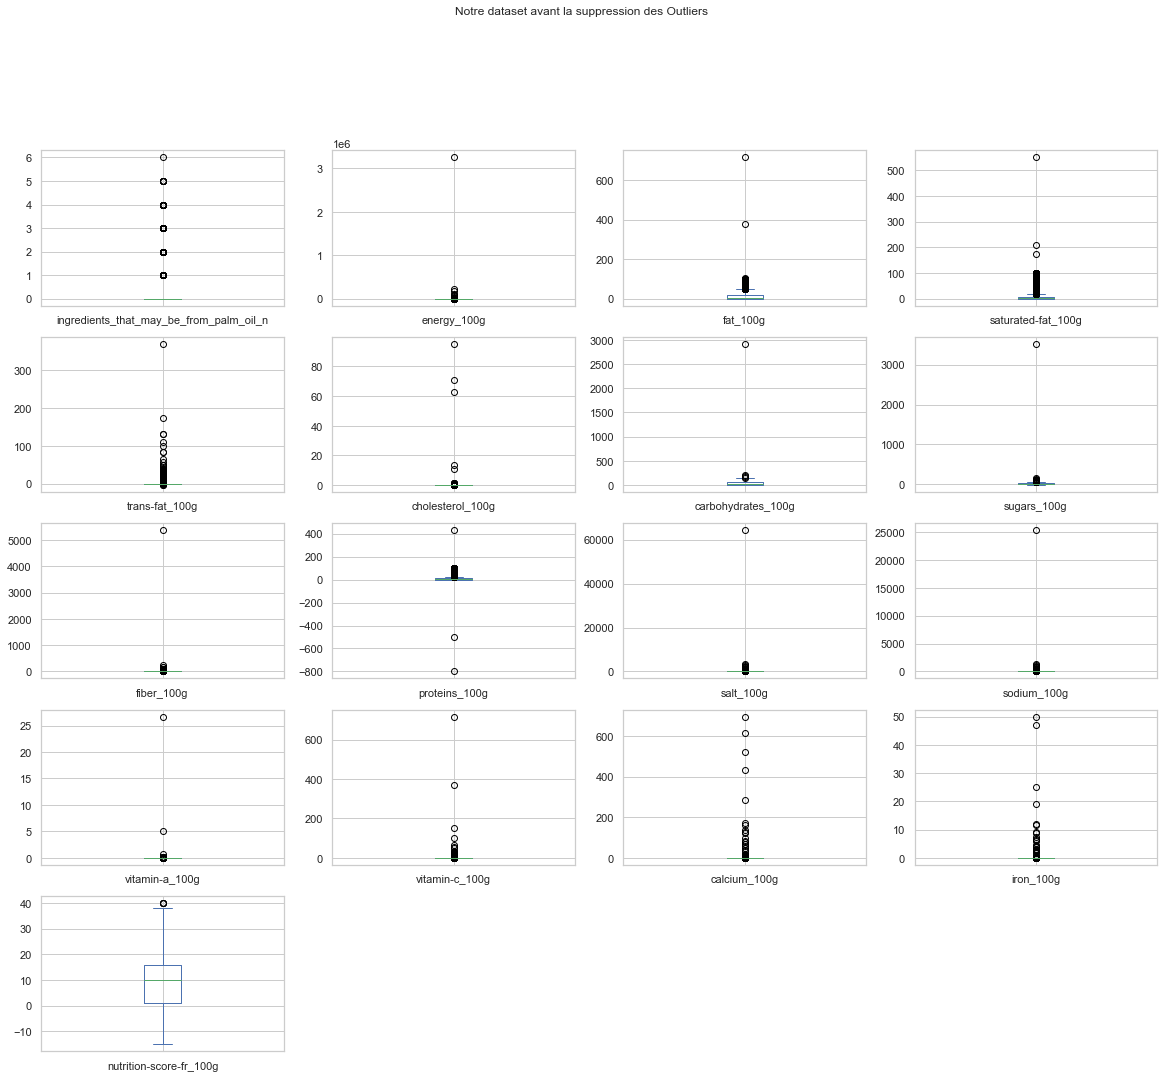

In [555]:
df.select_dtypes(include=float).plot(kind='box', subplots=True, title='Notre dataset avant la suppression des Outliers', figsize=(20,20), layout=(6,4))

plt.show()

In [556]:
df.describe()

,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259906.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000
mean,0.055246,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.076366,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535
std,0.269207,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409137,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000
75%,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000
max,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000


In [557]:
df_clean = df.copy()
df_clean.shape

(320749, 32)

## Anomalie liée à la nature des données


Pour les données nutritives ne peuvent excéder 100g -> Suppression des valeurs superieure à 100 et inférieure à 0, colonnes concernées : 
    salt_100g, fiber_100g, sugars_100g, carbohydrates_100g, fat_100g, saturated-fat_100g, "proteins_100g", "sodium_100g"

In [558]:
#for col in ['energy_100g'] : 
#    ind = df_clean.loc[(df_clean[col] < 0) | (df_clean[col] > 900)].index.to_list()
#    df_clean.drop(index=ind, inplace=True)

#for col in cols : 
#    ind = df_clean.loc[(df_clean[col] < 0) | (df_clean[col] > 100)].index.to_list()
#    df_clean.drop(index=ind, inplace=True)

def deleteOutlier(df, col, min_value, max_value):
    mask = (df.loc[:,col] >= max_value) | (df.loc[:,col] <= min_value)
    index_to_drop = df.index[mask]
    df.drop(index=index_to_drop, inplace=True)
deleteOutlier(df_clean, 'energy_100g', 0, 900)
cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', "fiber_100g", "proteins_100g", "sodium_100g", "salt_100g"]
for col in cols : 
    deleteOutlier(df_clean, col, 0, 100)


In [559]:
df_clean.shape


(94342, 32)

In [560]:
len(df) - len(df_clean)

226407

Ce traitement à permis de supprimer 226407 entrée

In [561]:
#len(df) - len(df_clean_outliers) -------> cela me semble pas cohérent voir si vraiment la colonne energy_100g raisonne en kcal

## Traitement des outliers à l'aide de la médiane (IQR)
On va utiliser la méthode de l'écart interquartile (IQR) pour definir des valeur de seuils des outliers. On considère comme outliers si les produits possèdent une valeur supérieur au seuil médiane +/- 1,5 l'écart intercartile.

In [562]:
df_clean_outliers = df_clean.copy()
df_clean_outliers.shape

(94342, 32)

In [563]:
interquartile = iqr(df_clean_outliers.loc[:,'energy_100g'], nan_policy='omit')
print(f'interquartile : {interquartile}')
mediane = np.nanmedian(df_clean_outliers.loc[:,'energy_100g'])
print(f'mediane : {mediane}')

interquartile : 373.0
mediane : 455.0


In [564]:
lim_min = mediane - 1.5 * interquartile
lim_max = mediane + 1.5 * interquartile

In [565]:
deleteOutlier(df_clean_outliers, 'energy_100g', lim_min, lim_max)

Voici le résultat du nettoyage des données avant traitement, après traitement métier et après traitement statistique.

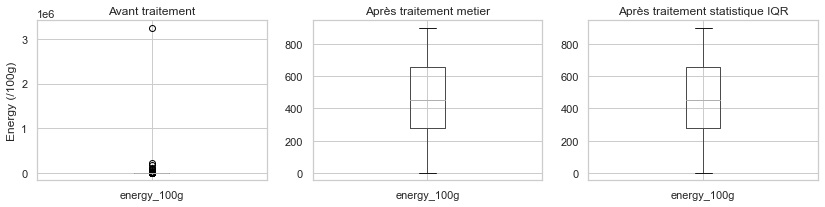

In [566]:
plt.figure(3, figsize=(14, 10))
plt.subplot(331)
df_init.boxplot(column='energy_100g')
plt.title('Avant traitement')
plt.ylabel('Energy (/100g)')

plt.subplot(332)
df_clean.boxplot(column='energy_100g')
plt.title("Après traitement metier")

plt.subplot(333)
df_clean_outliers.boxplot(column='energy_100g')
plt.title('Après traitement statistique IQR')
plt.show()

Nous allons pouvoir automatiser ces étapes par la fonctione deleteOutlierAuto pour filtrer les valeurs en dehors des 1.5 fois l'IQR

In [567]:
def deleteOutlierAuto(col):
    interquartile = iqr(df_clean_outliers.loc[:,col], nan_policy='omit')
    mediane = np.nanmedian(df_clean_outliers.loc[:,col])
    lim_min = mediane - 1.5 * interquartile
    lim_max = mediane + 1.5 * interquartile
    deleteOutlier(df_clean_outliers, col, lim_min, lim_max)

In [568]:
def plotTraitement(col, unit):
    plt.figure(3, figsize=(14, 10))
    plt.subplot(331)
    df.boxplot(column=col)
    plt.title('Avant traitement')
    plt.ylabel(unit)

    plt.subplot(332)
    df_clean.boxplot(column=col)
    plt.title('Après traitement métier')

    plt.subplot(333)
    df_clean_outliers.boxplot(column=col)
    plt.title('Après traitement statistique')
    plt.tight_layout()
    plt.show()

In [569]:
def plotTraitementViolin(col, unit):
    plt.figure(3, figsize=(14, 10))
    plt.subplot(331)
    sns.violinplot(y=col, data=df)
    plt.title('Avant traitement')
    plt.ylabel(unit)
    plt.xlabel(col)

    plt.subplot(332)
    sns.violinplot(y=col, data=df_clean)
    plt.title('Après traitement métier')
    plt.ylabel(unit)
    plt.xlabel(col)

    plt.subplot(333)
    sns.violinplot(y=col, data=df_clean_outliers)
    plt.title('Après traitement statistique')
    plt.ylabel(unit)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

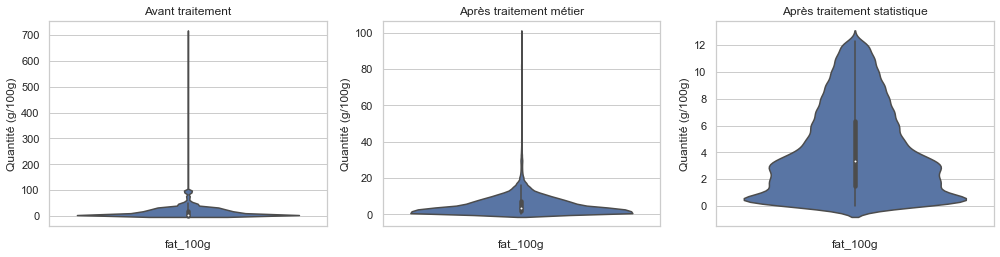

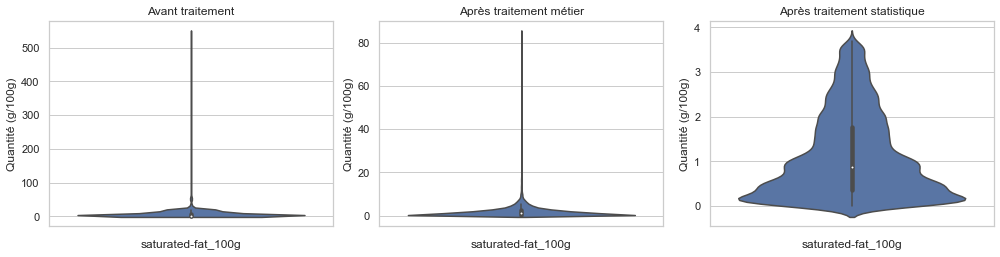

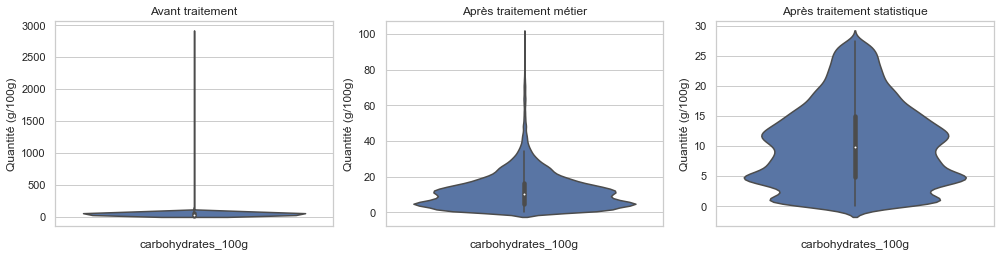

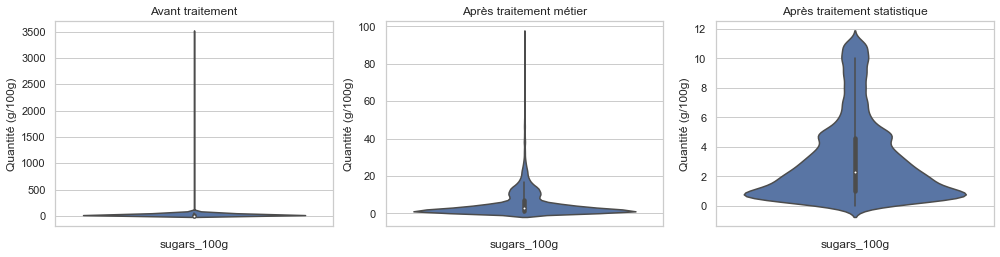

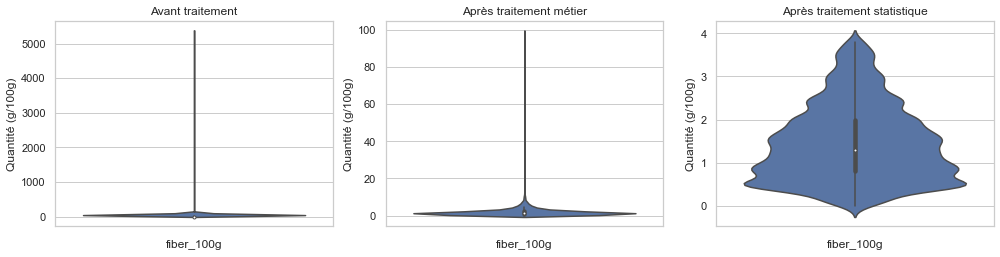

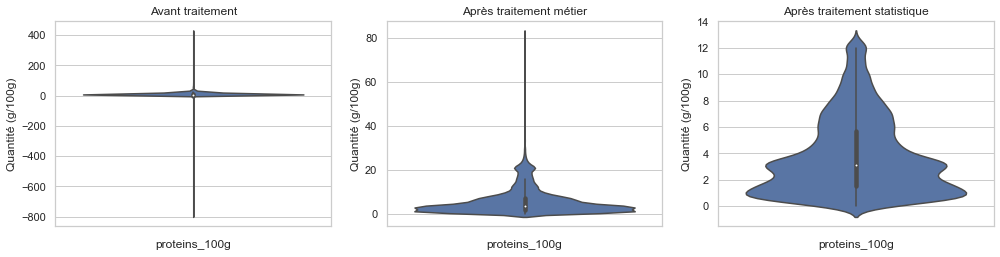

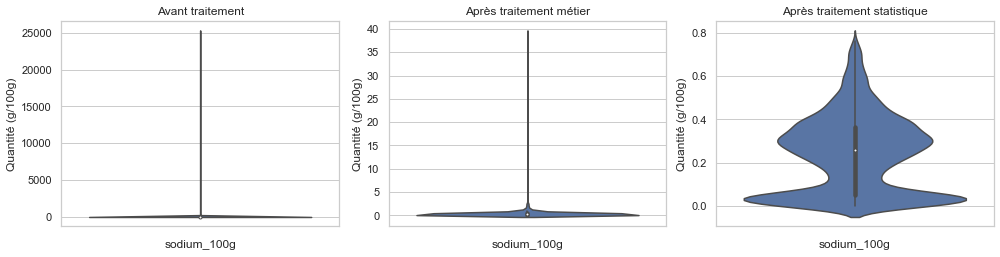

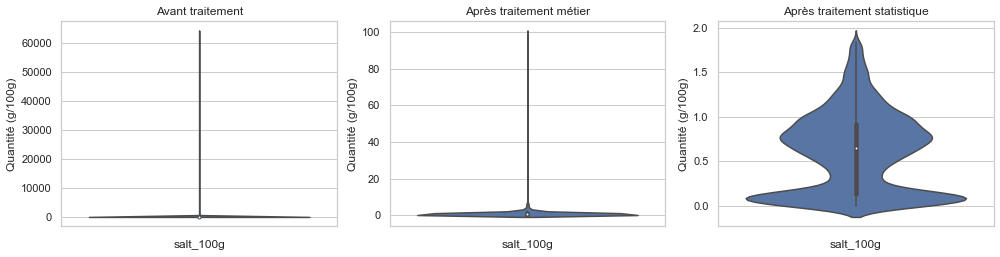

In [570]:
cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', "fiber_100g", "proteins_100g", "sodium_100g", "salt_100g"]
for col in cols:
    deleteOutlierAuto(col)
    plotTraitementViolin(col,'Quantité (g/100g)')

In [571]:
print("Il reste {:,} lignes dans nos données ".format(df_clean_outliers.shape[0]))

Il reste 77,555 lignes dans nos données 


Notre dataset a été nettoyer de ses valeurs redondante, manquante et surtout de ses valeurs abérrantes.

Nous allons imputer les valeurs manquantes par la mediane pour eviter d'avoir un jeu de donnée trop restreint et non exploitable pour la suite de notre projet applicatif

In [572]:
df_etude = df_clean_outliers.copy()

len(df_etude)

77555

<AxesSubplot:>

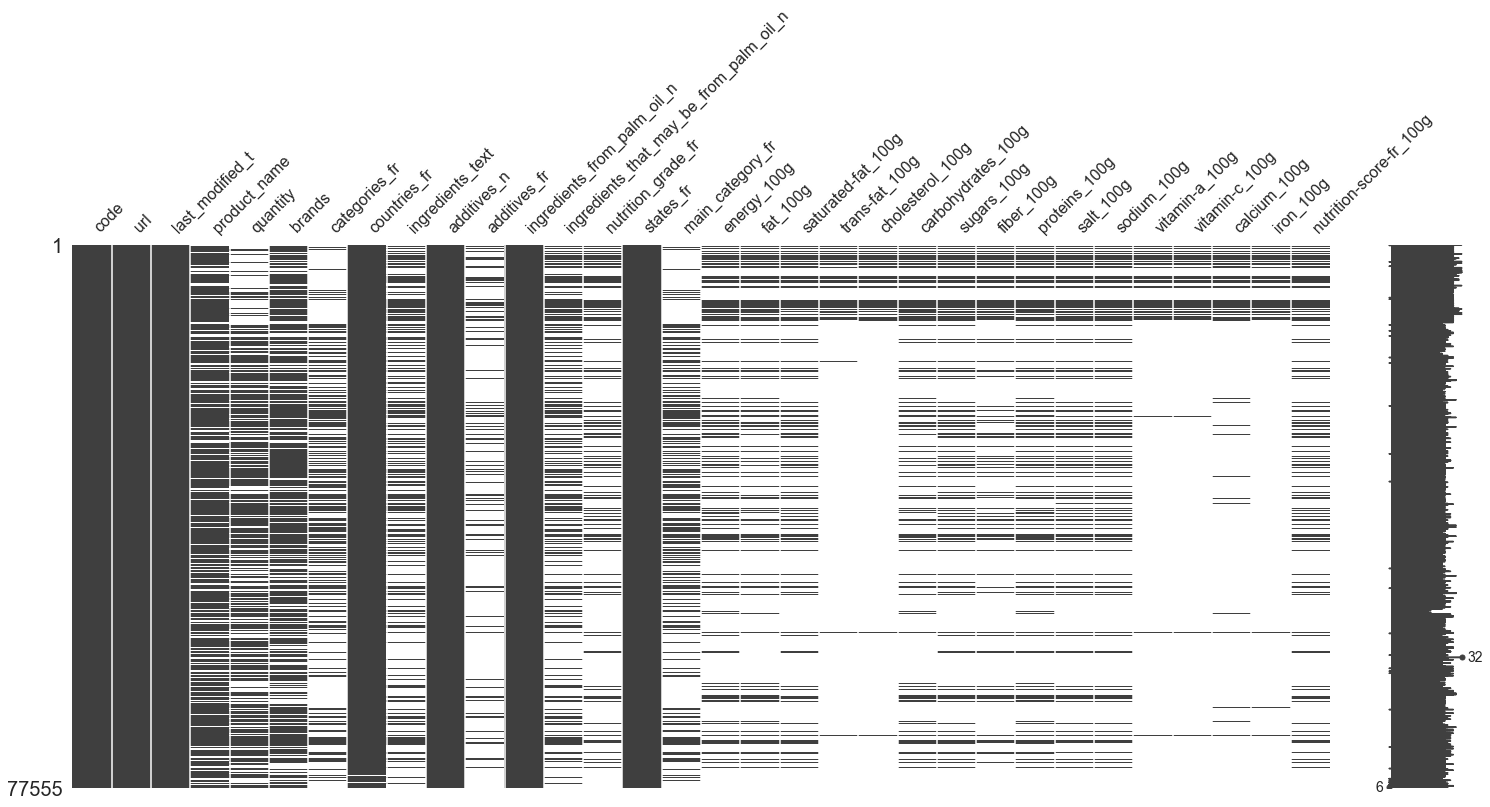

In [573]:
msno.matrix(df_etude)

### Remplacement des valeurs manquantes par la mediane

Tout d'abord, on décide d'enlever toutes les lignes où le nom du produit ne figure pas. 
Ensuite, on choisit d'imputer les valeurs manquantes en utilisant la médiane en fonction de la variable pnns_groups_2. 
La variable pnns_groups_2 est celle où il y a le moins de valeurs manquantes ce qui signifie qu'il y aura plus d'imputation qu'avec une variable ayant plus de donneés manquantes.

In [574]:
# Suppression des lignes sans product_name
df_etude.dropna(subset=['product_name'], inplace=True) 

In [575]:
# Cette imputation est réaliser uniquement pour les valeurs numériques

for cols in df_etude.columns:
    if df_etude[cols].dtypes == "float64":
        df_etude[cols].fillna(df_etude[cols].median(), inplace=True)

    - Traitement des chaînes de caractères : 
Ce dataset sera celui utilisé dans la suite de notre analyse. 
Remplacement des valeurs manquantes des catégories par une valeur unknown au lieu de laisser un NaN. 
Concernant les pays, on remplace les pays manquants par la valeur other. 
Ces modifications empêcheront le retrait de la ligne lors de l'utilisation de la fonction dropna.


In [588]:
df_etude["countries_fr"].fillna("other", inplace=True)
df_etude["categories_fr"].fillna("unknown", inplace=True)
df_etude["brands"].fillna("unknown", inplace=True)
df_etude["main_category_fr"].fillna("unknown", inplace=True)
df_etude["ingredients_text"].fillna("unknown", inplace=True)
df_etude["quantity"].fillna("unknown", inplace=True)
df_etude["additives_fr"].fillna("unknown", inplace=True)
#set new category unknown"
df_etude["nutrition_grade_fr"] = df_etude["nutrition_grade_fr"].cat.add_categories("unknown")
df_etude["nutrition_grade_fr"].fillna("unknown", inplace=True)

<AxesSubplot:>

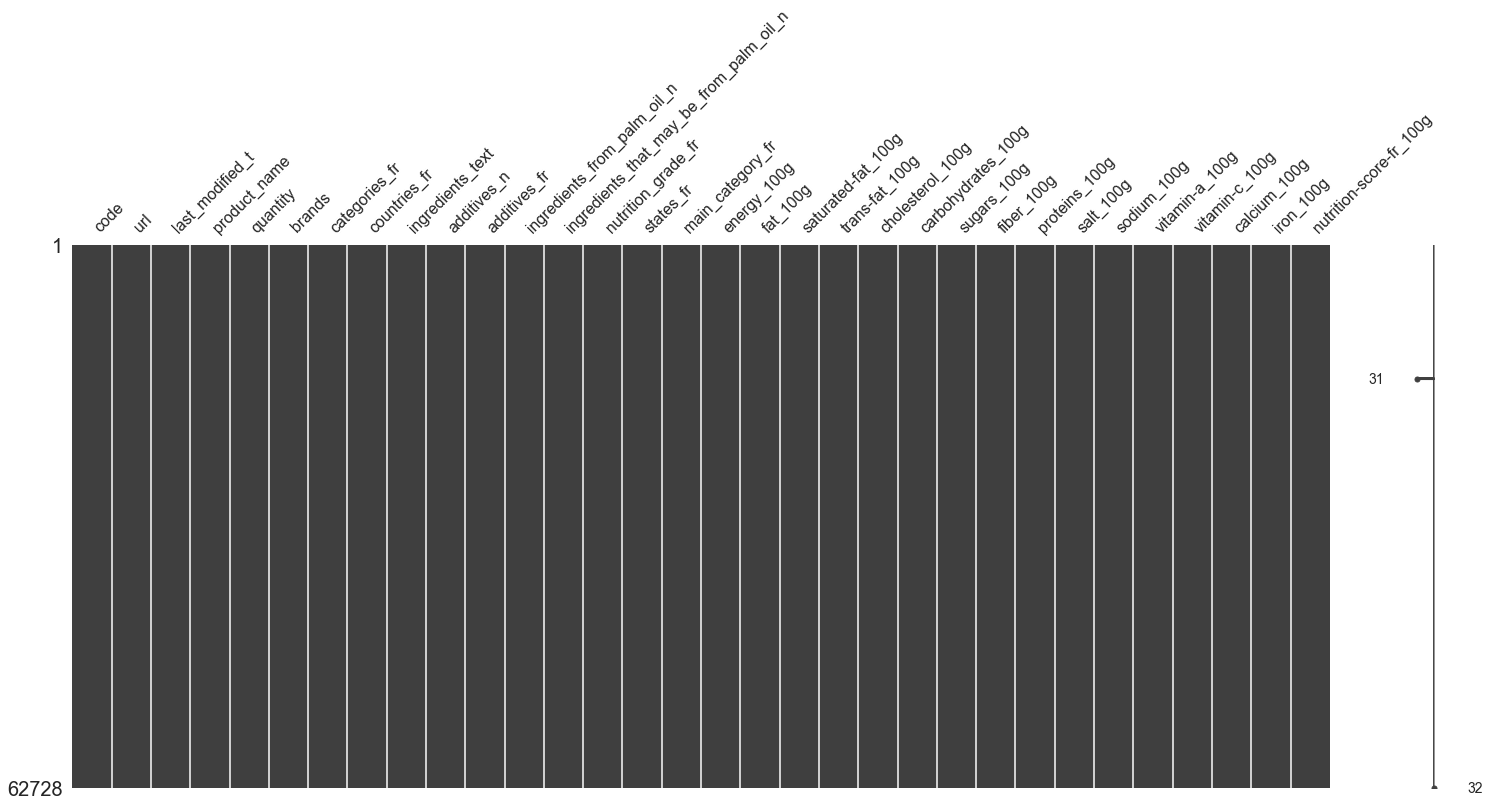

In [589]:
msno.matrix(df_etude)

In [597]:
df_etude.to_csv("openfoodfacts_clean_IQR_mediane.csv", index=False)

## Fichier en l'état sans nettoyer enlever les valeurs manquantes

In [598]:
df_clean_outliers.to_csv("openfoodfacts_clean_outliers.csv", index=False)

## Taille du dataset final comparée à la taille du dataset intial

In [599]:
pd.DataFrame({'Nom' : ['Données intiales', 'Données nettoyées', 'Données nettoyées NaN -> Mediane', 'Donnée écart IQR / mediane', 'Données sans NaN'], 
                            'Dimension' : [df_init.shape, df_clean_outliers.shape, df_clean_median.shape, df_etude.shape, df_clean_no_na.shape],
                            'Proportion de NaN (en %)' :
                            [df_init.isna().sum().sum()/df_init.shape[0]/df_init.shape[1]*100,
                             df_clean.isna().sum().sum()/df_clean.shape[0]/df_clean.shape[1]*100,
                             df_clean_median.isna().sum().sum()/df_clean_median.shape[0]/df_clean_median.shape[1]*100,
                             df_etude.isna().sum().sum()/df_etude.shape[0]/df_etude.shape[1]*100,
                             df_clean_no_na.isna().sum().sum()/df_clean_no_na.shape[0]/df_clean_no_na.shape[1]*100
                            ]
                           })

,Nom,Dimension,Proportion de NaN (en %)
0,Données intiales,"(320772, 162)",76.221573
1,Données nettoyées,"(77555, 32)",51.175842
2,Données nettoyées NaN -> Mediane,"(302987, 35)",18.709044
3,Donnée écart IQR / mediane,"(62728, 32)",0.001146
4,Données sans NaN,"(527, 32)",0.000000
